In [105]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import ast
import datetime
import seaborn as sns
from collections import Counter
import numpy as np

In [106]:
df = pd.read_csv('main_task.xls')

In [115]:
'''
0. calculating days since last review (considering the 2018-02-26 is the last date) and days between reviews
1. replacing outliers with median (for days b/w reviews) and max (for days since last review)
2. replacing outliers with max value (excluding outlier values) amount of reviews
3. adding data on max rank per city
'''
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return {'min': lower_bound, 'max': upper_bound}

def remove_outliers(value, outliers):
    if outliers.get('max') > value > outliers.get('min'):
        return value
    else:
        return

def days_since_review(string):
    max_date = datetime.datetime.strptime('2018-02-26', '%Y-%m-%d')
    if type(string) == str:
        try:
            content = ast.literal_eval(string)
            if len(content)>0:
                l_dates = [datetime.datetime.strptime(x, '%m/%d/%Y') for x in content[1]]
                if len(l_dates) > 0:
                    min_date = max(l_dates)
                return (max_date - min_date).days
        except:
            return

def days_between_reviews(string):
    if type(string) == str:
        try:
            content = ast.literal_eval(string)
            if len(content)>0:
                l_dates = [datetime.datetime.strptime(x, '%m/%d/%Y') for x in content[1]]
                if len(l_dates) >= 2:
                    min_date = min(l_dates)
                    max_date = max(l_dates)
                    return (max_date - min_date).days
        except:
            return

df['Days_Since_Review'] = df['Reviews'].apply(days_since_review)
outliners = outliers_iqr(df['Days_Since_Review'].dropna())
df['Days_Since_Review'] = df['Days_Since_Review'].apply(lambda x: remove_outliers(x, outliners))
df['Days_Since_Review'].fillna(value=df['Days_Since_Review'].max())

df['Days_Between_Reviews'] = df['Reviews'].apply(days_between_reviews)
outliners = outliers_iqr(df['Days_Between_Reviews'].dropna())
df['Days_Between_Reviews'] = df['Days_Between_Reviews'].apply(lambda x: remove_outliers(x, outliners))
df['Days_Between_Reviews'].fillna(value=df['Days_Between_Reviews'].median())

outliners = outliers_iqr(df['Number of Reviews'].dropna())
df['Number_of_Reviews'] = df['Number of Reviews'].apply(lambda x: remove_outliers(x, outliners))
df['Number_of_Reviews'].fillna(value=df['Number_of_Reviews'].max())

city_max_rank = {}
for city in df['City'].unique():
    city_max_rank[city] = df.query('City == @city')['Ranking'].max()
df['City_max_Rank'] = df['City'].replace(city_max_rank)

,City,City_max_Rank,Ranking,Ranking_Relative_1
0,Paris,13986.0,5570.0,19556.0
1,Stockholm,2464.0,1537.0,4001.0
2,London,16444.0,353.0,16797.0
3,Berlin,6372.0,3458.0,9830.0
4,Munich,2763.0,621.0,3384.0
...,...,...,...,...
39995,Milan,6275.0,500.0,6775.0
39996,Paris,13986.0,6341.0,20327.0
39997,Stockholm,2464.0,1652.0,4116.0
39998,Warsaw,2141.0,641.0,2782.0


In [116]:
df[['City', 'City_max_Rank', 'Ranking', 'Ranking_Relative', 'Rating']]

,City,City_max_Rank,Ranking,Ranking_Relative_1,Rating
0,Paris,13986.0,5570.0,19556.0,3.5
1,Stockholm,2464.0,1537.0,4001.0,4.0
2,London,16444.0,353.0,16797.0,4.5
3,Berlin,6372.0,3458.0,9830.0,5.0
4,Munich,2763.0,621.0,3384.0,4.0
...,...,...,...,...,...
39995,Milan,6275.0,500.0,6775.0,4.5
39996,Paris,13986.0,6341.0,20327.0,3.5
39997,Stockholm,2464.0,1652.0,4116.0,4.5
39998,Warsaw,2141.0,641.0,2782.0,4.0


min 0.0
max 402.0
median 57.0


{'min': -163.0, 'max': 317.0}

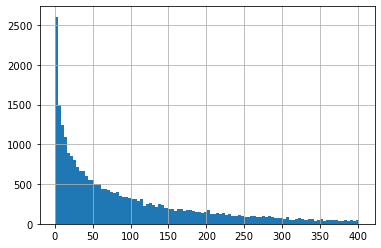

In [108]:
df['Days_Between_Reviews'].hist(bins=100)

print('min', df['Days_Between_Reviews'].min())
print('max', df['Days_Between_Reviews'].max())
print('median', df['Days_Between_Reviews'].median())

outliers_iqr(df['Days_Between_Reviews'].dropna())

min 0.0
max 720.0
median 136.0


{'min': -212.0, 'max': 548.0}

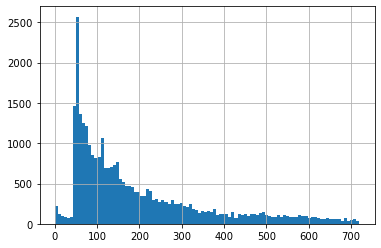

In [109]:
df['Days_Since_Review'].hist(bins=100)

print('min', df['Days_Since_Review'].min())
print('max', df['Days_Since_Review'].max())
print('median', df['Days_Since_Review'].median())

outliers_iqr(df['Days_Since_Review'].dropna())

#for i in df.query('LatestReview > 722')['Reviews']: print(i)

min 2.0
max 273.0
median 25.0


{'min': -88.375, 'max': 168.625}

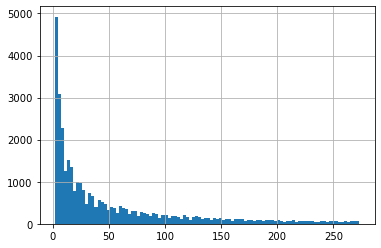

In [110]:
df['Number_of_Reviews'].hist(bins=100)

print('min', df['Number_of_Reviews'].min())
print('max', df['Number_of_Reviews'].max())
print('median', df['Number_of_Reviews'].median())

outliers_iqr(df['Number_of_Reviews'].dropna())

